In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [226]:
data_train = pd.read_csv("./train.csv")
data_test = pd.read_csv("./test.csv")
#data = data_train.append(data_test, sort=False)

In [227]:
data_train['datetime'] = pd.to_datetime(data_train['datetime'],format='%Y-%m-%d %H:%M:%S', utc=True)
data_train['day'] = data_train.datetime.dt.day
data_train['month'] = data_train.datetime.dt.month
data_train['hour'] = data_train.datetime.dt.hour
data_train  = data_train.drop(["datetime"],axis=1)

In [228]:
data_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4


In [229]:
datetimecol = data_test["datetime"]
data_test['datetime'] = pd.to_datetime(data_test['datetime'],format='%Y-%m-%d %H:%M:%S', utc=True)
data_test['day'] = data_test.datetime.dt.day
data_test['month'] = data_test.datetime.dt.month
data_test['hour'] = data_test.datetime.dt.hour
data_test  = data_test.drop(["datetime"],axis=1)

In [230]:
data_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4


In [231]:
categoryVariableList = ["hour","season","weather","holiday","workingday", "month", "day"]
for var in categoryVariableList:
    data_train[var] = data_train[var].astype("category")
    data_test[var] = data_test[var].astype("category")

In [232]:
data_train.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
day           category
month         category
hour          category
dtype: object

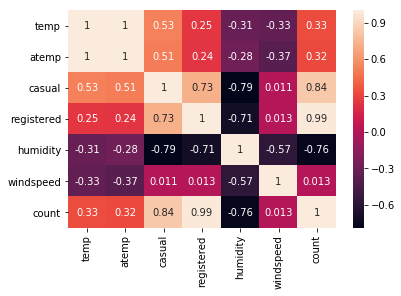

In [233]:
import seaborn as sns
corr = data_train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr().corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot = True)

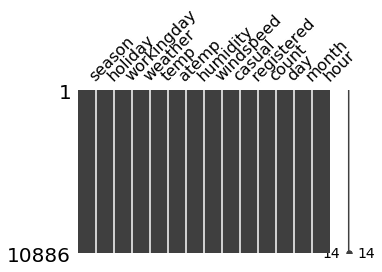

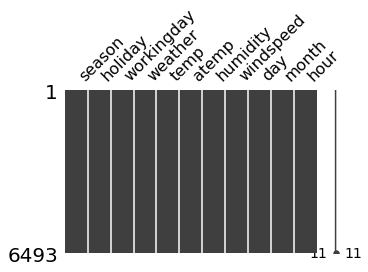

In [234]:
import missingno as msno
msno.matrix(data_train,figsize=(5,3))
msno.matrix(data_test, figsize=(5, 3))

In [235]:
data_train = data_train.drop(["temp", "registered", "casual"], axis=1)
data_test = data_test.drop(["temp"], axis=1)
data_test.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,day,month,hour
0,1,0,1,1,11.365,56,26.0027,20,1,0
1,1,0,1,1,13.635,56,0.0000,20,1,1
2,1,0,1,1,13.635,56,0.0000,20,1,2
3,1,0,1,1,12.880,56,11.0014,20,1,3
4,1,0,1,1,12.880,56,11.0014,20,1,4


In [236]:
data_train.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,count,day,month,hour
0,1,0,0,1,14.395,81,0.0,16,1,1,0
1,1,0,0,1,13.635,80,0.0,40,1,1,1
2,1,0,0,1,13.635,80,0.0,32,1,1,2
3,1,0,0,1,14.395,75,0.0,13,1,1,3
4,1,0,0,1,14.395,75,0.0,1,1,1,4


In [237]:
X_train = data_train.values[:, [0,1,2,3,4,5,6,8,9,10]]
y_train = data_train.values[:, 7]
X_test = data_test.values

In [238]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 4:7] = sc.fit_transform(X_train[:, 4:7])
X_test[:, 4:7] = sc.transform(X_test[:, 4:7])

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [239]:
"""from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(X_train, y_train)
lr.get_params()"""

'from sklearn.linear_model import LinearRegression\nlr = LinearRegression()\nlr = lr.fit(X_train, y_train)\nlr.get_params()'

In [240]:
"""from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr = rfr.fit(X_train, y_train)
rfr.get_params()"""

'from sklearn.ensemble import RandomForestRegressor\nrfr = RandomForestRegressor(max_depth=2, random_state=0)\nrfr = rfr.fit(X_train, y_train)\nrfr.get_params()'

In [241]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'bootstrap': [True, False]}


In [242]:
"""rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)"""

'rf = RandomForestRegressor()\nrf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)\nrf_random.fit(X_train, y_train)'

In [243]:
from sklearn.metrics import mean_squared_log_error

def evaluate(model, test_features):
    predictions = model.predict(test_features)
    model_score = np.sqrt(mean_squared_log_error(y_train, predictions))
    
    return model_score

base_model = RandomForestRegressor()
base_model.fit(X_train, y_train)
base_score = evaluate(base_model, X_train)
print ("Base Score : " + str(base_score))

"""
best_random = rf_random.best_estimator_
random_score = evaluate(best_random, X_train)
print ("Random Score : " + str(random_score))

print('Improvement of {:0.2f}%.'.format( random_score - base_score))"""

Base Score : 0.204557664116


'\nbest_random = rf_random.best_estimator_\nrandom_score = evaluate(best_random, X_train)\nprint ("Random Score : " + str(random_score))\n\nprint(\'Improvement of {:0.2f}%.\'.format( random_score - base_score))'

In [244]:
#predictions_test_random = best_random.predict(X_test)
predictions_test_base = base_model.predict(X_test)

In [245]:
submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": predictions_test_base
    })
submission.to_csv('submit.csv', index=False)